In [40]:
import numpy as np
import importlib
import dataset
import config, plotting, sample, SampleCharacter, XLim, QRselection
import QrModels, Point
import copy
import RelativeImportance
import Measure

importlib.reload(config)
importlib.reload(dataset)
importlib.reload(plotting)
importlib.reload(sample)
importlib.reload(SampleCharacter)
importlib.reload(XLim)
importlib.reload(QRselection)
importlib.reload(QrModels)
importlib.reload(Point)
importlib.reload(RelativeImportance)
importlib.reload(Measure)

<module 'Measure' from 'D:\\netSVG\\Measure.py'>

In [41]:
import os
dataset_config = config.DatasetConfig(scenario="functional_3d", n_instance=1000)

assert(dataset_config.scenario == "functional_3d")
fig_dir = f"../figures/{dataset_config.scenario}"

try:
    os.mkdir(fig_dir)
    print(f"Directory {fig_dir} created ") 
except FileExistsError:
    print(f"Directory {fig_dir} already exists replacing files in this notebook")


Directory ../figures/functional_3d already exists replacing files in this notebook


In [42]:
file_name_test = "../data/functional_3d/test_data.txt"
X_test,Y_test = dataset.get_functional_test_data(file_name_test)

In [43]:
file_name_train = "../data/functional_3d/train_data.txt"
X_train,Y_train = dataset.get_functional_train_data(file_name_train)

In [44]:
exp_config = config.Config(
    model=config.ModelConfig(activation="elu", lr_gen=0.0001, dec_gen=0, lr_disc=0.001, optim_gen="Adam", 
                             optim_disc="Adam", z_input_size=1),
    training=config.TrainingConfig(n_epochs=2000, batch_size=100, n_samples=100),
    dataset=dataset_config,
    run=config.RunConfig(save_fig=1)
)


In [45]:
coef = sample.get_sta_reg_cov(X_train,Y_train)

Unstandardized regression coefficient: 
[-0.15479  0.58584  0.12249]
normal coefficient: 
-0.15191
Standardized regression coefficient: 
[-0.05544  0.2064   0.04542]
normal coefficient: 
-0.0


In [46]:
imp = RelativeImportance.relativeImp_3d()
imp = list(imp.values())
print("The importance for every dimension:")
print(imp)

100%|██████████| 2/2 [00:00<00:00, 2003.01it/s]


Selecting 3 Best Predictors for the Model
Selected Predictors :  ['x0', 'x1', 'x2']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.05161678554492288

Selecting 3 Best Predictors for the Model
Selected Predictors :  ['x0', 'x1', 'x2']

Creating models for 7 possible combinations of 3 features :
#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################
#########################  Variable Dominance Calculation Done!!!!!  #########################

The importance for every dimension:
[0.05720758118754153, 0.8343303736592382, 0.1084620451532201]


In [47]:
length, max_dist = sample.get_sample_length(X_train,imp)

Euclidean distance in x domain：
minist dist:
0.03
maxist imp:
0.8343303736592382
The original length of the smaple: 
[0.00206 0.03    0.0039 ]


In [48]:
x_min = np.amin(X_train, axis=0)
x_max = np.amax(X_train, axis=0)
L = sample.get_x_len(x_min, x_max)

The value area of x in the sample is between -0.951132 and 0.913872in the dimension of No. 0
The value area of x in the sample is between -0.926874 and 0.906914in the dimension of No. 1
The value area of x in the sample is between -0.9567 and 0.972208in the dimension of No. 2
The full length of every dimension:
[1.865004 1.833788 1.928908]


In [49]:
n_sample,length = sample.divide_sample(length, L)

The number of diversions of the 0th dimension is: 906
906
The number of diversions of the 1th dimension is: 62
62
The number of diversions of the 2th dimension is: 495
495
总的样方分割数为：
27805140
The number of diversions of the 0th dimension is: 755
755
The number of diversions of the 1th dimension is: 51
51
The number of diversions of the 2th dimension is: 413
413
总的样方分割数为：
15902565
The number of diversions of the 0th dimension is: 629
629
The number of diversions of the 1th dimension is: 43
43
The number of diversions of the 2th dimension is: 344
344
总的样方分割数为：
9304168
The number of diversions of the 0th dimension is: 524
524
The number of diversions of the 1th dimension is: 36
36
The number of diversions of the 2th dimension is: 287
287
总的样方分割数为：
5413968
The number of diversions of the 0th dimension is: 437
437
The number of diversions of the 1th dimension is: 30
30
The number of diversions of the 2th dimension is: 239
239
总的样方分割数为：
3133290
The number of diversions of the 0th dimension is

In [50]:
dim = len(X_train[0])
gen_x = sample.gen_x_center(dim,length,n_sample, x_min)

第0维度，最小的x为-0.951132
第0维度的中心值有：
[-0.8829, -0.74643, -0.60996, -0.47349, -0.33702, -0.20055, -0.06408, 0.07239, 0.20886, 0.34533, 0.4818, 0.61827, 0.75474, 0.89121]
第1维度，最小的x为-0.926874
第1维度的中心值有：
[0.06684]
第2维度，最小的x为-0.9567
第2维度的中心值有：
[-0.82752, -0.56915, -0.31079, -0.05242, 0.20594, 0.46431, 0.72267, 0.98104]


In [51]:
gen_sample_point = sample.gen_product(gen_x)
#print("样方中心点：")
gen_sample_point = np.array(gen_sample_point)
#print(gen_sample_point)

In [52]:
xlimit = []
for index in range(len(n_sample)):
    l = []
    for i in range(n_sample[index]):
        x = x_min[index] + i * length[index]
        l.append(x)
    l.append(x_min[index] + n_sample[index] * length[index])
    xlimit.append(l)

In [53]:
sample_list = []
xlim_list = []

In [54]:
x_value = []
for index in range(dim):
    xl = []
    for i in range(len(X_train)):
        x = X_train[i][index]
        r = 0
        for xi in xl:
            if xi == x:
                r = 1
        if r == 0:
            xl.append(x)
    x_value.append(xl)
    
x_value_ori = copy.deepcopy(x_value)

In [55]:
XLim.con_s(gen_sample_point, sample_list, dim, xlimit)

In [56]:
XLim.con_sample(xlim_list, length, x_min, dim, n_sample)

In [57]:
XLim.sample_feature(xlim_list, sample_list, x_value)

In [58]:
gen_x_cross = sample.gen_product(x_value)

In [59]:
f_list = []
sample.cross_point_del(gen_x_cross, X_train)
sample.point_filiter(gen_x_cross, X_train, max_dist, x_value, x_value_ori, dim, f_list)

In [60]:
plot_xlim = copy.deepcopy(xlimit)
for index in range(dim):
    i = len(plot_xlim[index])
    plot_xlim[index][i-1] = x_max[index]

In [61]:
XLim.sample_attri(sample_list, X_train, gen_x_cross, Y_train)
XLim.check(sample_list, f_list, gen_x_cross, X_train,xlim_list)
XLim.xl_attri(xlim_list, X_train, gen_x_cross)
XLim.add_xvalue(xlim_list)
gen_x_cross = np.array(gen_x_cross)

In [62]:
import GPy

noise = 1
length_ = 1

run_hyperopt_search = True

kernel = GPy.kern.RBF(input_dim=3, variance=noise, lengthscale=length_)
gpr = GPy.models.GPRegression(X_train, Y_train.reshape(-1,1), kernel)
if run_hyperopt_search:
    gpr.optimize(messages=True) 

In [63]:
gen_y_cross, cov_train_cross = gpr.predict(np.array(gen_x_cross))

In [64]:
XLim.add_y(sample_list, gpr)
print("over")

over


In [65]:
point_list = []
Point.con_point(gen_x_cross, gen_y_cross, point_list)
print("over")

over


In [66]:
for sample in sample_list:
    for index in range(len(sample.gen_xlist)):
        for point in point_list:
            r = -1
            for i in range(dim):
                if point.x[i] != sample.gen_xlist[index][i]:
                    r = 0
                    break
            if r == -1:
                sample.points.append(point)
print("over")

over


In [67]:
import statsmodels.api as sm
qrX = X_train
qrX = sm.add_constant(qrX[0:])
qr = sm.QuantReg(Y_train.reshape(-1,1),qrX)
res = qr.fit(q=.2)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.1881
Model:                       QuantReg   Bandwidth:                      0.9821
Method:                 Least Squares   Sparsity:                        2.143
Date:                Thu, 17 Sep 2020   No. Observations:                   30
Time:                        22:52:45   Df Residuals:                       26
                                        Df Model:                            3
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5537      0.167     -3.325      0.003      -0.896      -0.211
x1             0.1499      0.355      0.422      0.677      -0.581       0.881
x2             0.8809      0.424      2.076      0.048       0.009       1.753
x3             0.2749      0.388      0.708      0.4

In [68]:
quantiles = np.arange(.05, .96, .1)
quantiles = np.around(quantiles, decimals=3)
def fit_model(q):
    res = qr.fit(q=q)
    return q, np.around(res.params,decimals=  4)

models = []

for x in quantiles:
    q, param = fit_model(x)
    model = QrModels.QrModels(q, param[0], param[1:])
    models.append(model)

for model in models:
    print(str(model.q)+'\t'+str(model.a)+'\t'+str(model.param))

ols = sm.OLS(Y_train.reshape(-1,1),qrX).fit()
           
for ol in ols.params:
    print(str(ol))
print("over")

 D:\CondaEnv\netSVGpython36\lib\site-packages\statsmodels\regression\quantile_regression.py:235: RuntimeWarning:invalid value encountered in less_equal


0.05	-2.5978	[0.2266 3.1361 1.8457]
0.15	-1.1433	[0.9661 0.804  0.7029]
0.25	-0.5486	[0.1184 0.8982 0.2722]
0.35	-0.3209	[0.0471 0.5541 0.2107]
0.45	-0.2466	[0.0543 0.5112 0.1468]
0.55	-0.1401	[0.0357 0.4327 0.0577]
0.65	0.0231	[-0.1355  0.4526  0.0334]
0.75	0.5673	[-0.741  -0.1682  0.4746]
0.85	1.2297	[-1.3027 -1.1098 -0.5048]
0.95	1.6675	[-0.6815 -1.5848 -0.3954]
-0.15190824833147382
-0.15479179976891233
0.585842201253043
0.12248925691794517
over


In [69]:
y_quantile = [-3.586, -1.143, -0.554, -0.179, 0.002, 0.027, 0.113, 0.307, 0.693, 2.900]

In [70]:
vir_xpoint = []
vir_ypoint = []

for xv in x_value:
    xv.sort()
for xv in x_value_ori:
    xv.sort()
print("over")

over


In [71]:
QRselection.qr_selection2(xlim_list, models, vir_xpoint, vir_ypoint, y_quantile, ols, x_value_ori,
                 n_sample, X_train, Y_train, sample_list, point_list, x_value)
print("over")

over


In [72]:
i = 0
for point in point_list:
    if point.checked == 1:
        i += 1
print("over")

over


In [73]:
del_point = []
vir_point = []

for point in point_list:
    point.true = dataset.function_3d(point.x[0], point.x[1], point.x[2])
    point.erro = point.true - point.y
    if point.y not in vir_ypoint:
        del_point.append(point)
    else:
        vir_point.append(point)
print("over")

over


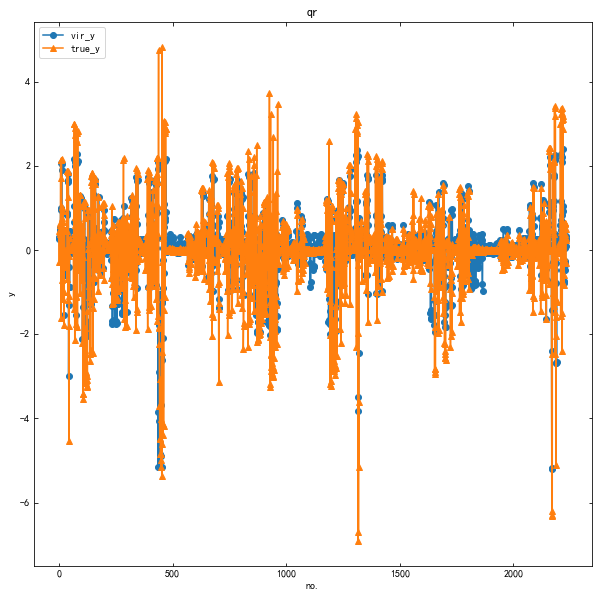

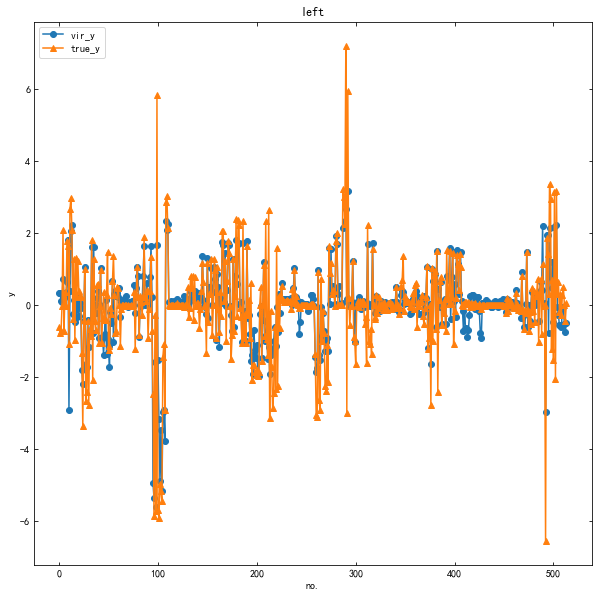

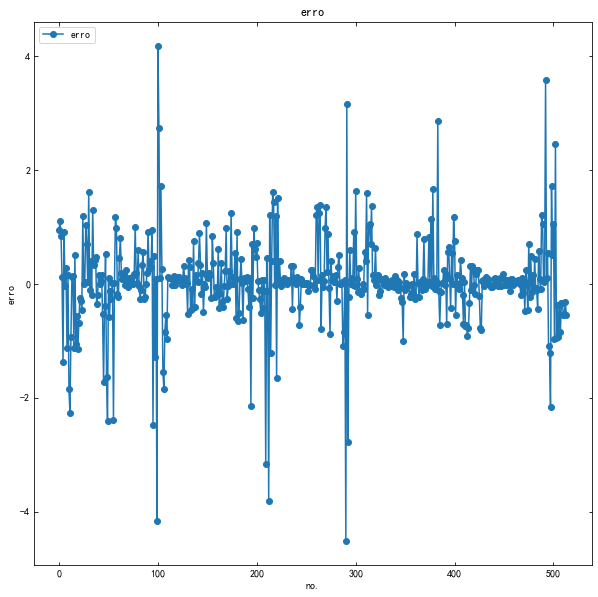

In [74]:
plotting.plot_qr(del_point, exp_config, fig_dir, "qr")
plotting.plot_qr(vir_point, exp_config, fig_dir, "left")
plotting.plot_erro(vir_point, exp_config, fig_dir, "erro")

In [75]:
'''
exist_list = []
for sample in sample_list:
    points = []
    for index in range(len(sample.points)):
        if sample.points[index] in vir_point:
            points.append(sample.points[index])
    if len(points) > 0:
        if sample.ori_num == 0:
            i = np.random.randint(0, len(points))
            exist_list.append(points[i])
        else:
            #i = np.random.randint(0, len(points), size = sample.ori_num + 1)
            i = len(points)
            for j in range(i):
                exist_list.append(points[j])

e_list = []
for point in exist_list:
    e_list.append(point.x)      
print("over")
'''

'\nexist_list = []\nfor sample in sample_list:\n    points = []\n    for index in range(len(sample.points)):\n        if sample.points[index] in vir_point:\n            points.append(sample.points[index])\n    if len(points) > 0:\n        if sample.ori_num == 0:\n            i = np.random.randint(0, len(points))\n            exist_list.append(points[i])\n        else:\n            #i = np.random.randint(0, len(points), size = sample.ori_num + 1)\n            i = len(points)\n            for j in range(i):\n                exist_list.append(points[j])\n\ne_list = []\nfor point in exist_list:\n    e_list.append(point.x)      \nprint("over")\n'

In [76]:
mae = Measure.mae1(vir_point)
mse = Measure.mse1(vir_point)
mape = Measure.mape1(vir_point)
print(" all vir point")
print(mae)
print(mse)
print(mape)

 all vir point
[0.43738674]
[0.60076334]
[16.17588472]


In [77]:
np.savetxt("../figures/functional_3d/vx_data.txt", np.array(vir_xpoint),fmt='%.8f',delimiter=' ')

In [78]:
np.savetxt("../figures/functional_3d/vy_data.txt", np.array(vir_ypoint),fmt='%.8f',delimiter=' ')
